## COMPARISION CHARTS

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd

# File paths
file_paths = [
    "/content/drive/MyDrive/GIT AblationStratergy/fft_ablationStudy/results/ffttrain_target_modules_ablation_results.csv",
    "/content/drive/MyDrive/GIT AblationStratergy/fft_test_ablationStudy/results/fftTest_target_modules_ablation_results.csv",
    "/content/drive/MyDrive/GIT AblationStratergy/ablationStudy/results/LoRA/lora_target_modules_ablation_results_optimized.csv"
]

# Load all CSV files
dfs = {path.split("/")[-1]: pd.read_csv(path) for path in file_paths}

# Display first few rows of each file to understand structure
dfs_preview = {name: df.head() for name, df in dfs.items()}
dfs_preview

{'ffttrain_target_modules_ablation_results.csv':   experiment                                       train_losses  \
 0        fft  [11.020973205566406, 11.088132858276367, 10.96...   
 
                                           val_losses  \
 0  [11.064232063293456, 11.08807144165039, 11.098...   
 
                                      memory_usage_MB  training_time_seconds  \
 0  [4076.23779296875, 4076.23779296875, 4752.1621...            8509.155756   
 
    best_val_loss                                       best_weights  
 0      11.029737  OrderedDict([('git.embeddings.word_embeddings....  ,
 'fftTest_target_modules_ablation_results.csv':    experiment  test_loss                                         bleu_score
 0  fftTesting  11.193929  {'bleu': 0.024314319549676687, 'precisions': [...,
 'lora_target_modules_ablation_results_optimized.csv':          experiment                              train_losses  \
 0  lora_vision_only  [9.1095, 8.7356, 8.6907, 8.6234, 8.5891]   
 1   

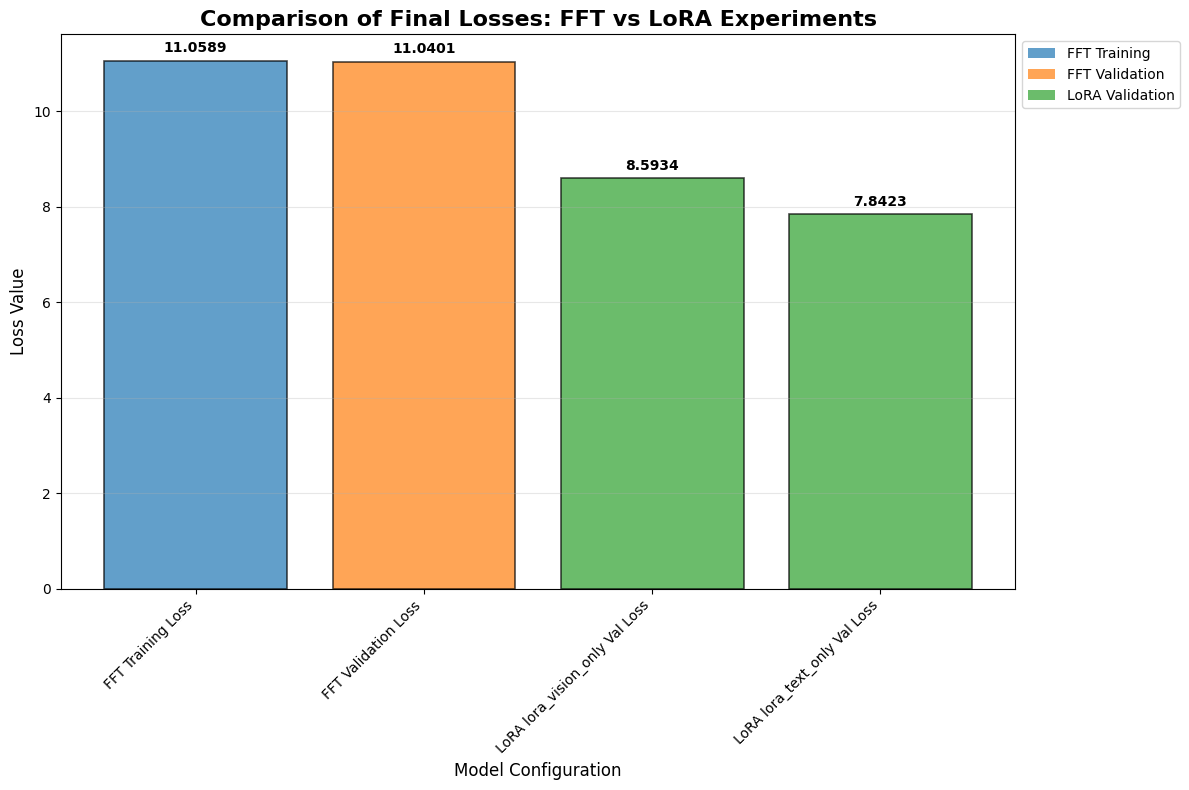


=== Loss Summary Statistics ===
FFT Training Loss: 11.0589
FFT Validation Loss: 11.0401
Average LoRA Validation Loss: 8.2179
Best LoRA Validation Loss: 7.8423 (lora_text_only)
Worst LoRA Validation Loss: 8.5934 (lora_vision_only)


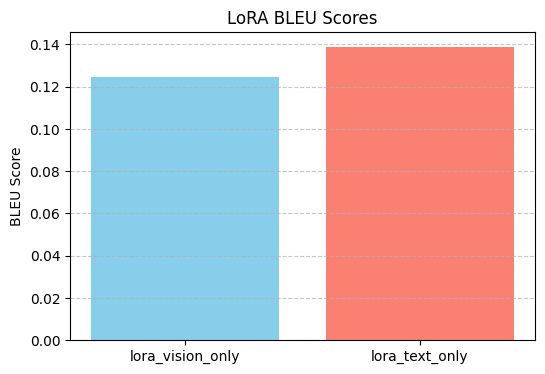

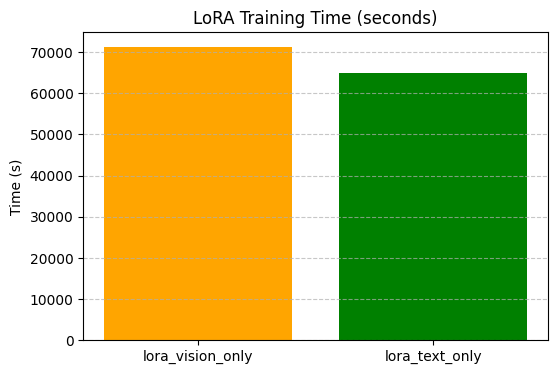

In [4]:
import ast
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to safely convert string lists to Python lists
def parse_list_column(df, col):
    return df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Parse the list-like columns
dfs["ffttrain_target_modules_ablation_results.csv"]["train_losses"] = parse_list_column(
    dfs["ffttrain_target_modules_ablation_results.csv"], "train_losses"
)
dfs["ffttrain_target_modules_ablation_results.csv"]["val_losses"] = parse_list_column(
    dfs["ffttrain_target_modules_ablation_results.csv"], "val_losses"
)
dfs["lora_target_modules_ablation_results_optimized.csv"]["train_losses"] = parse_list_column(
    dfs["lora_target_modules_ablation_results_optimized.csv"], "train_losses"
)
dfs["lora_target_modules_ablation_results_optimized.csv"]["val_losses"] = parse_list_column(
    dfs["lora_target_modules_ablation_results_optimized.csv"], "val_losses"
)

# Single comprehensive bar chart comparing all losses
plt.figure(figsize=(12, 8))

# Get FFT data
fft_train_df = dfs["ffttrain_target_modules_ablation_results.csv"]
fft_train_loss = fft_train_df["train_losses"].iloc[0][-1]  # Final FFT training loss
fft_val_loss = fft_train_df["val_losses"].iloc[0][-1]     # Final FFT validation loss

# Get LoRA data
lora_df = dfs["lora_target_modules_ablation_results_optimized.csv"]
lora_experiments = []
lora_val_losses = []

for idx, row in lora_df.iterrows():
    lora_experiments.append(row['experiment'])
    lora_val_losses.append(row['val_losses'][-1])  # Final validation losses for each LoRA experiment

# Create categories and values for the bar chart
categories = ['FFT Training Loss', 'FFT Validation Loss'] + [f'LoRA {exp} Val Loss' for exp in lora_experiments]
values = [fft_train_loss, fft_val_loss] + lora_val_losses

# Create colors - different colors for FFT vs LoRA experiments
colors = ['#1f77b4', '#ff7f0e'] + ['#2ca02c'] * len(lora_experiments)  # Blue for FFT train, orange for FFT val, green for LoRA

# Create the bar chart
bars = plt.bar(categories, values, color=colors, alpha=0.7, edgecolor='black', linewidth=1.2)

# Customize the plot
plt.title("Comparison of Final Losses: FFT vs LoRA Experiments", fontsize=16, fontweight='bold')
plt.ylabel("Loss Value", fontsize=12)
plt.xlabel("Model Configuration", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on top of each bar
for i, (bar, value) in enumerate(zip(bars, values)):
    plt.text(bar.get_x() + bar.get_width()/2, value + max(values) * 0.01,
             f'{value:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Add a legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor='#1f77b4', alpha=0.7, label='FFT Training'),
    plt.Rectangle((0, 0), 1, 1, facecolor='#ff7f0e', alpha=0.7, label='FFT Validation'),
    plt.Rectangle((0, 0), 1, 1, facecolor='#2ca02c', alpha=0.7, label='LoRA Validation')
]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# Optional: Summary statistics
print("\n=== Loss Summary Statistics ===")
print(f"FFT Training Loss: {fft_train_loss:.4f}")
print(f"FFT Validation Loss: {fft_val_loss:.4f}")
print(f"Average LoRA Validation Loss: {np.mean(lora_val_losses):.4f}")
print(f"Best LoRA Validation Loss: {min(lora_val_losses):.4f} ({lora_experiments[np.argmin(lora_val_losses)]})")
print(f"Worst LoRA Validation Loss: {max(lora_val_losses):.4f} ({lora_experiments[np.argmax(lora_val_losses)]})")

# Bar chart: LoRA BLEU scores
plt.figure(figsize=(6,4))
plt.bar(lora_df["experiment"], lora_df["bleu_score"], color=["skyblue", "salmon"])
plt.title("LoRA BLEU Scores")
plt.ylabel("BLEU Score")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Bar chart: LoRA Training Time
plt.figure(figsize=(6,4))
plt.bar(lora_df["experiment"], lora_df["training_time_seconds"], color=["orange", "green"])
plt.title("LoRA Training Time (seconds)")
plt.ylabel("Time (s)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


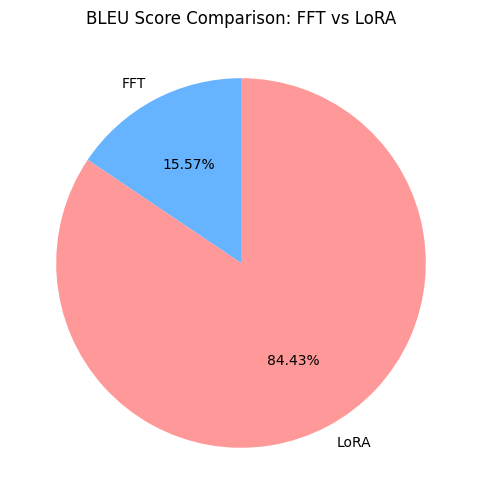

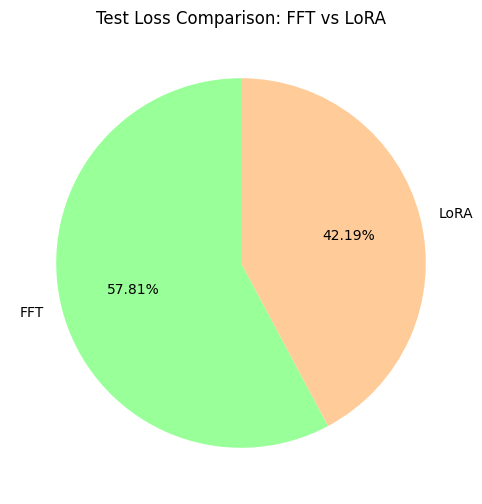

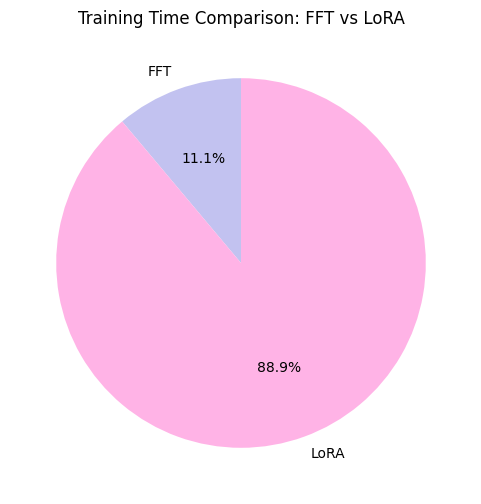

In [ ]:
# Prepare comparison data between FFT and LoRA

# FFT metrics
fft_train_df = dfs["ffttrain_target_modules_ablation_results.csv"]
fft_test_df = dfs["fftTest_target_modules_ablation_results.csv"]
fft_bleu = ast.literal_eval(fft_test_df["bleu_score"].iloc[0])["bleu"]
fft_loss = fft_test_df["test_loss"].iloc[0]
fft_time = fft_train_df["training_time_seconds"].iloc[0]

# LoRA metrics - take mean for fair comparison if multiple experiments
lora_df = dfs["lora_target_modules_ablation_results_optimized.csv"]
lora_bleu = lora_df["bleu_score"].mean()
lora_loss = lora_df["test_loss"].mean()
lora_time = lora_df["training_time_seconds"].mean()

# Pie chart for BLEU score comparison
plt.figure(figsize=(6,6))
plt.pie([fft_bleu, lora_bleu], labels=["FFT", "LoRA"], autopct='%1.2f%%', startangle=90, colors=["#66b3ff", "#ff9999"])
plt.title("BLEU Score Comparison: FFT vs LoRA")
plt.show()

# Pie chart for Test Loss (lower is better, but we show as proportion)
plt.figure(figsize=(6,6))
plt.pie([fft_loss, lora_loss], labels=["FFT", "LoRA"], autopct='%1.2f%%', startangle=90, colors=["#99ff99", "#ffcc99"])
plt.title("Test Loss Comparison: FFT vs LoRA")
plt.show()

# Pie chart for Training Time
plt.figure(figsize=(6,6))
plt.pie([fft_time, lora_time], labels=["FFT", "LoRA"], autopct='%1.1f%%', startangle=90, colors=["#c2c2f0", "#ffb3e6"])
plt.title("Training Time Comparison: FFT vs LoRA")
plt.show()
